In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Adam\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv("Student_Performance.csv")

In [3]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


# pretraitement de donnees

In [4]:
#detecter les valeurs manquantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
data.duplicated().sum()

127

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.duplicated().sum()

0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   object 
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 539.9+ KB


In [60]:
data.describe(include='all')

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873,9873.000000,9873.000000,9873.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,No,NaN,NaN,NaN
freq,NaN,NaN,4986,NaN,NaN,NaN
mean,4.992100,69.441102,NaN,6.531652,4.583004,55.216651
std,2.589081,17.325601,NaN,1.697683,2.867202,19.208570
min,1.000000,40.000000,NaN,4.000000,0.000000,10.000000
25%,3.000000,54.000000,NaN,5.000000,2.000000,40.000000
50%,5.000000,69.000000,NaN,7.000000,5.000000,55.000000
75%,7.000000,85.000000,NaN,8.000000,7.000000,70.000000


In [22]:
numerical = data.select_dtypes(include="number")

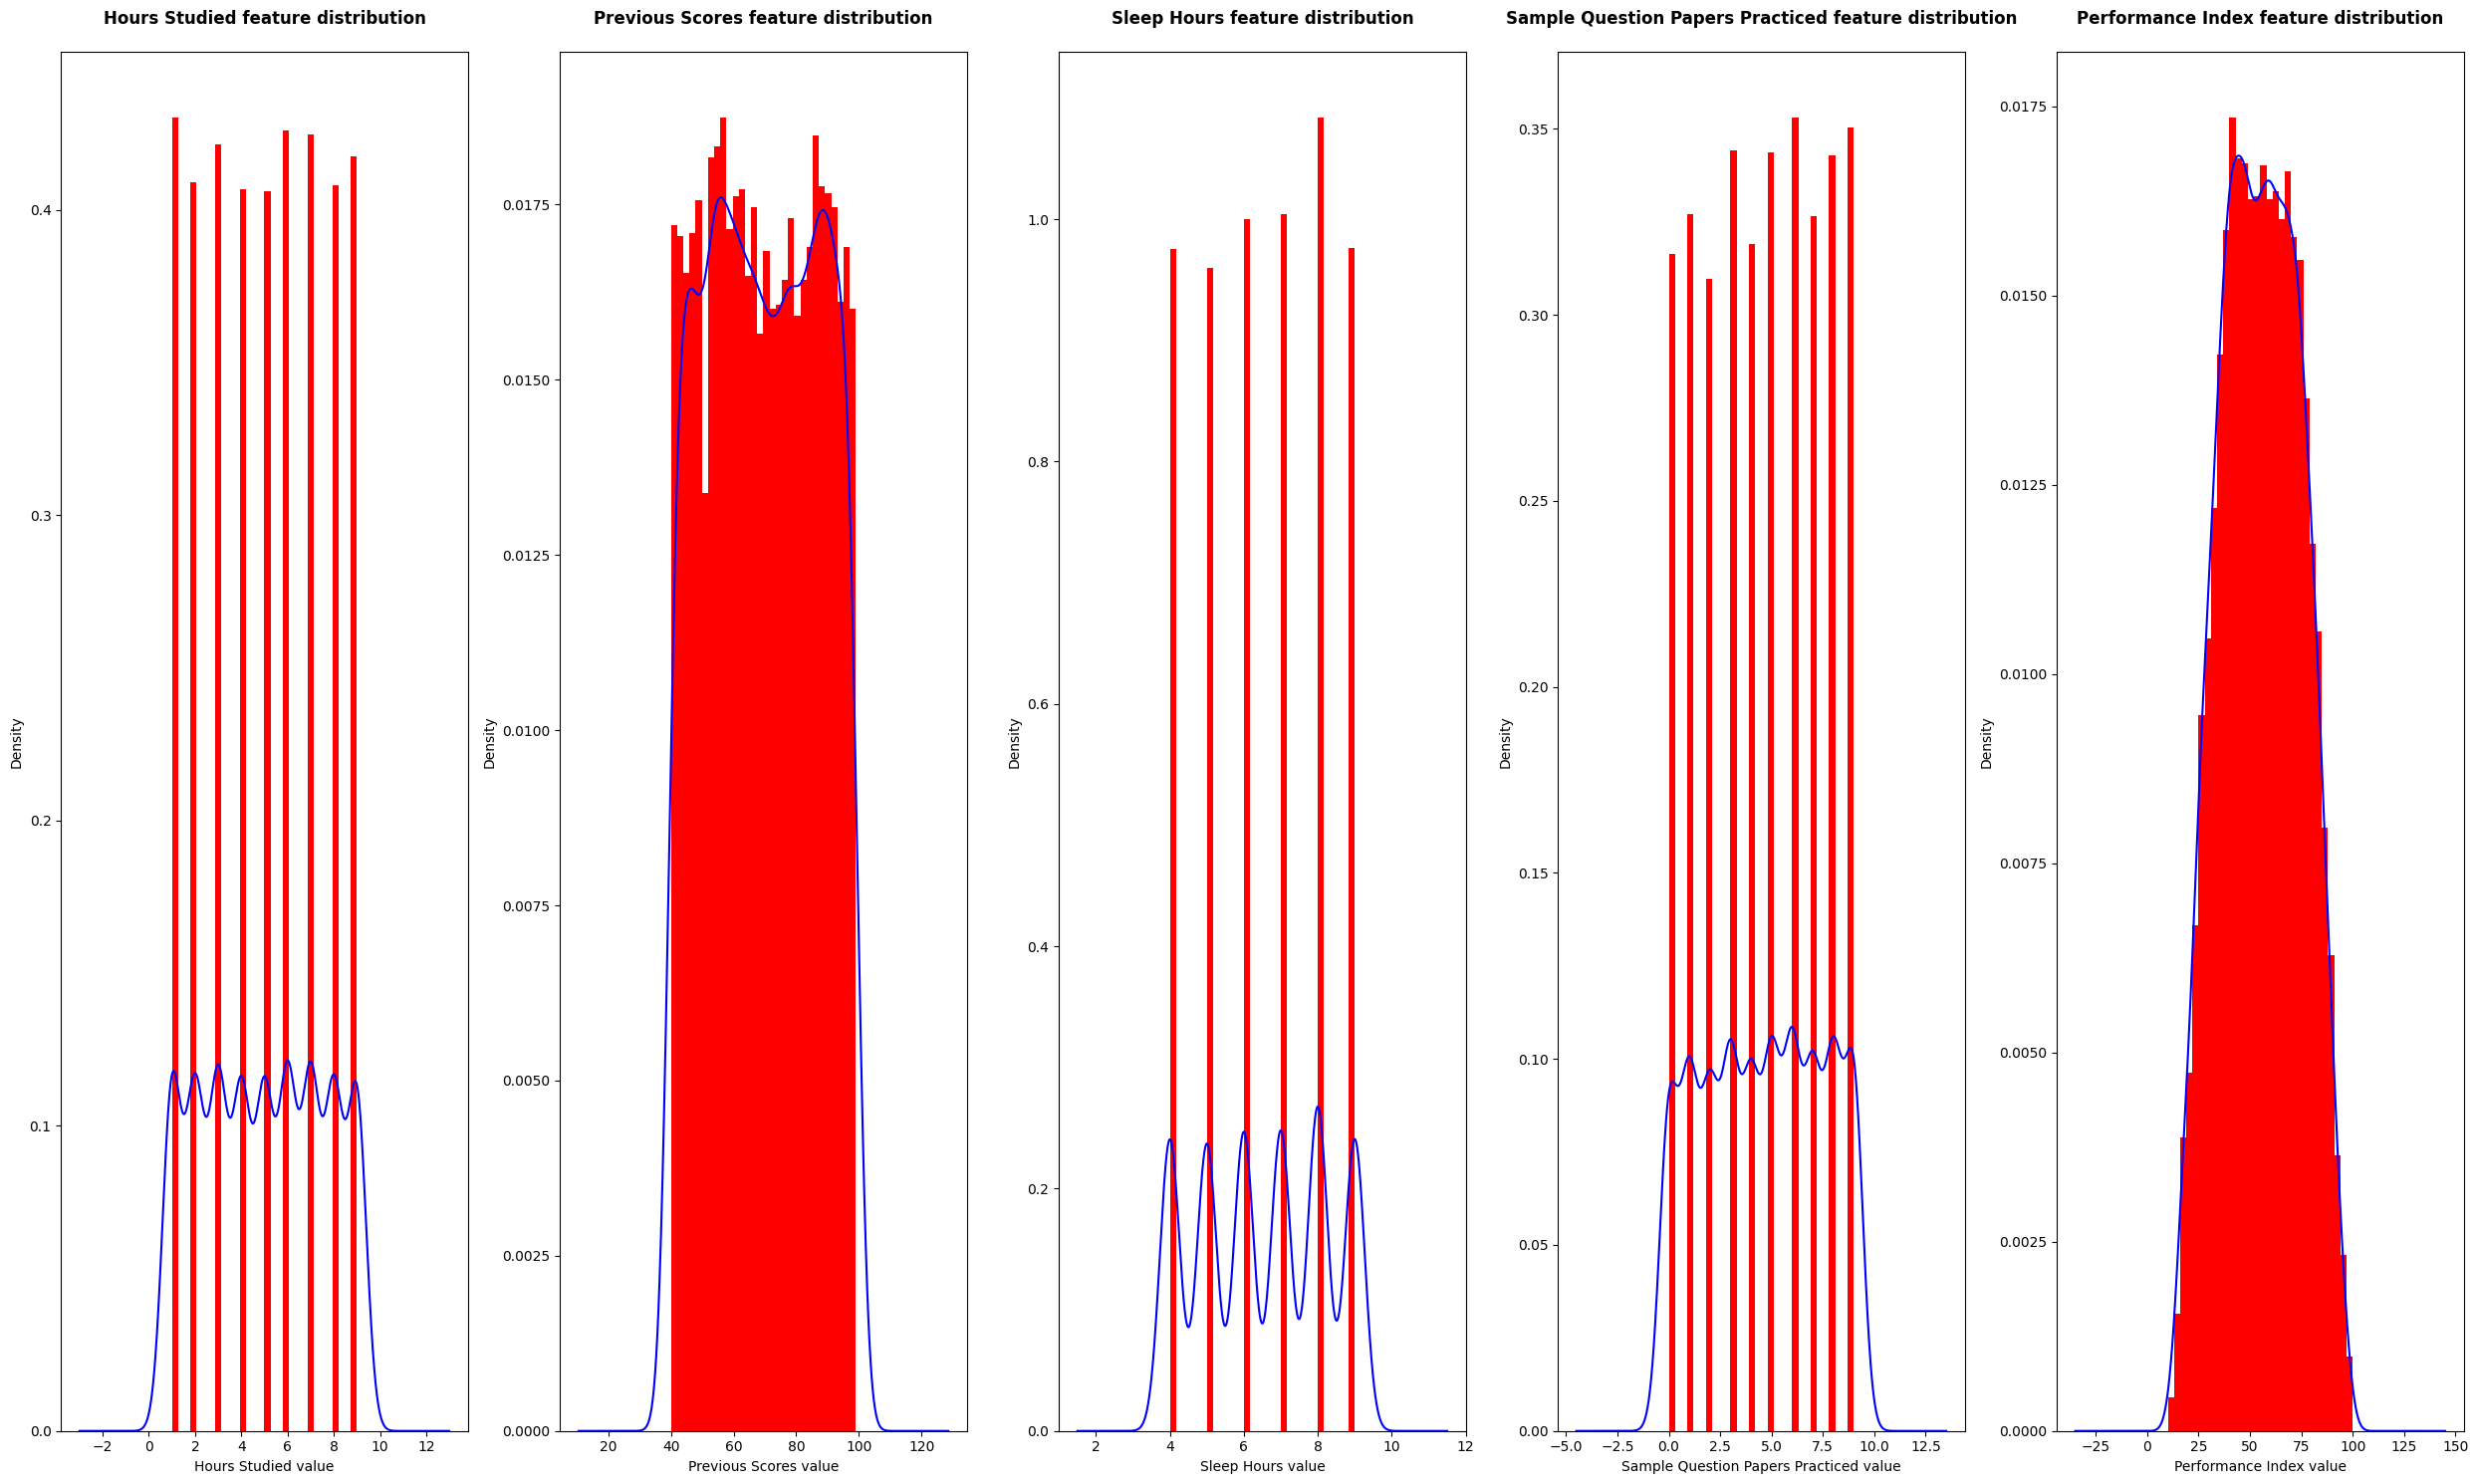

In [34]:
numerical = data.select_dtypes(include="number")

# Data Distribution of Numerical Features
fig = plt.figure(figsize=(25, 15))
ax_value = []

# Create subplots dynamically based on the number of numerical features
for i in range(len(numerical.columns)): 
    ax_value.append(fig.add_subplot(1, len(numerical.columns), i+1))  # Create subplot in 1 row and len(numerical) columns

    # Plot histogram and KDE for each numerical feature
    numerical.iloc[:, i].plot(kind='hist', density=True, color='red', ax=ax_value[i], bins=30)
    numerical.iloc[:, i].plot(kind='kde', color='blue', ax=ax_value[i])
    
    # Set titles and labels for each subplot
    ax_value[i].set_title(f'{numerical.columns[i]} feature distribution', fontweight='bold', pad=20)
    ax_value[i].set_xlabel(f'{numerical.columns[i]} value')
    ax_value[i].set_ylabel('Density')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

In [ ]:
activities = pd.get_dummies(data['Extracurricular Activities'], drop_first=True).astype(int)

In [54]:
activities

,activities
0,1
1,0
2,1
3,1
4,0
...,...
9995,1
9996,1
9997,1
9998,1


In [27]:
data=data.drop(columns=('Extracurricular Activities'))

In [55]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [42]:
activities.rename(columns={'Yes':"activities"},inplace=True)

In [56]:
data = pd.concat([activities,data],axis=1)

In [57]:
data.columns

Index(['activities', 'Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

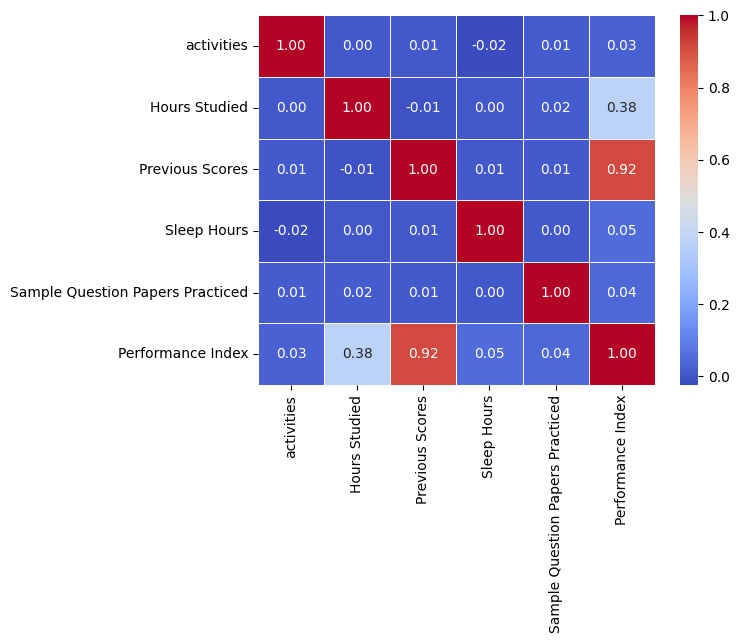

In [58]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

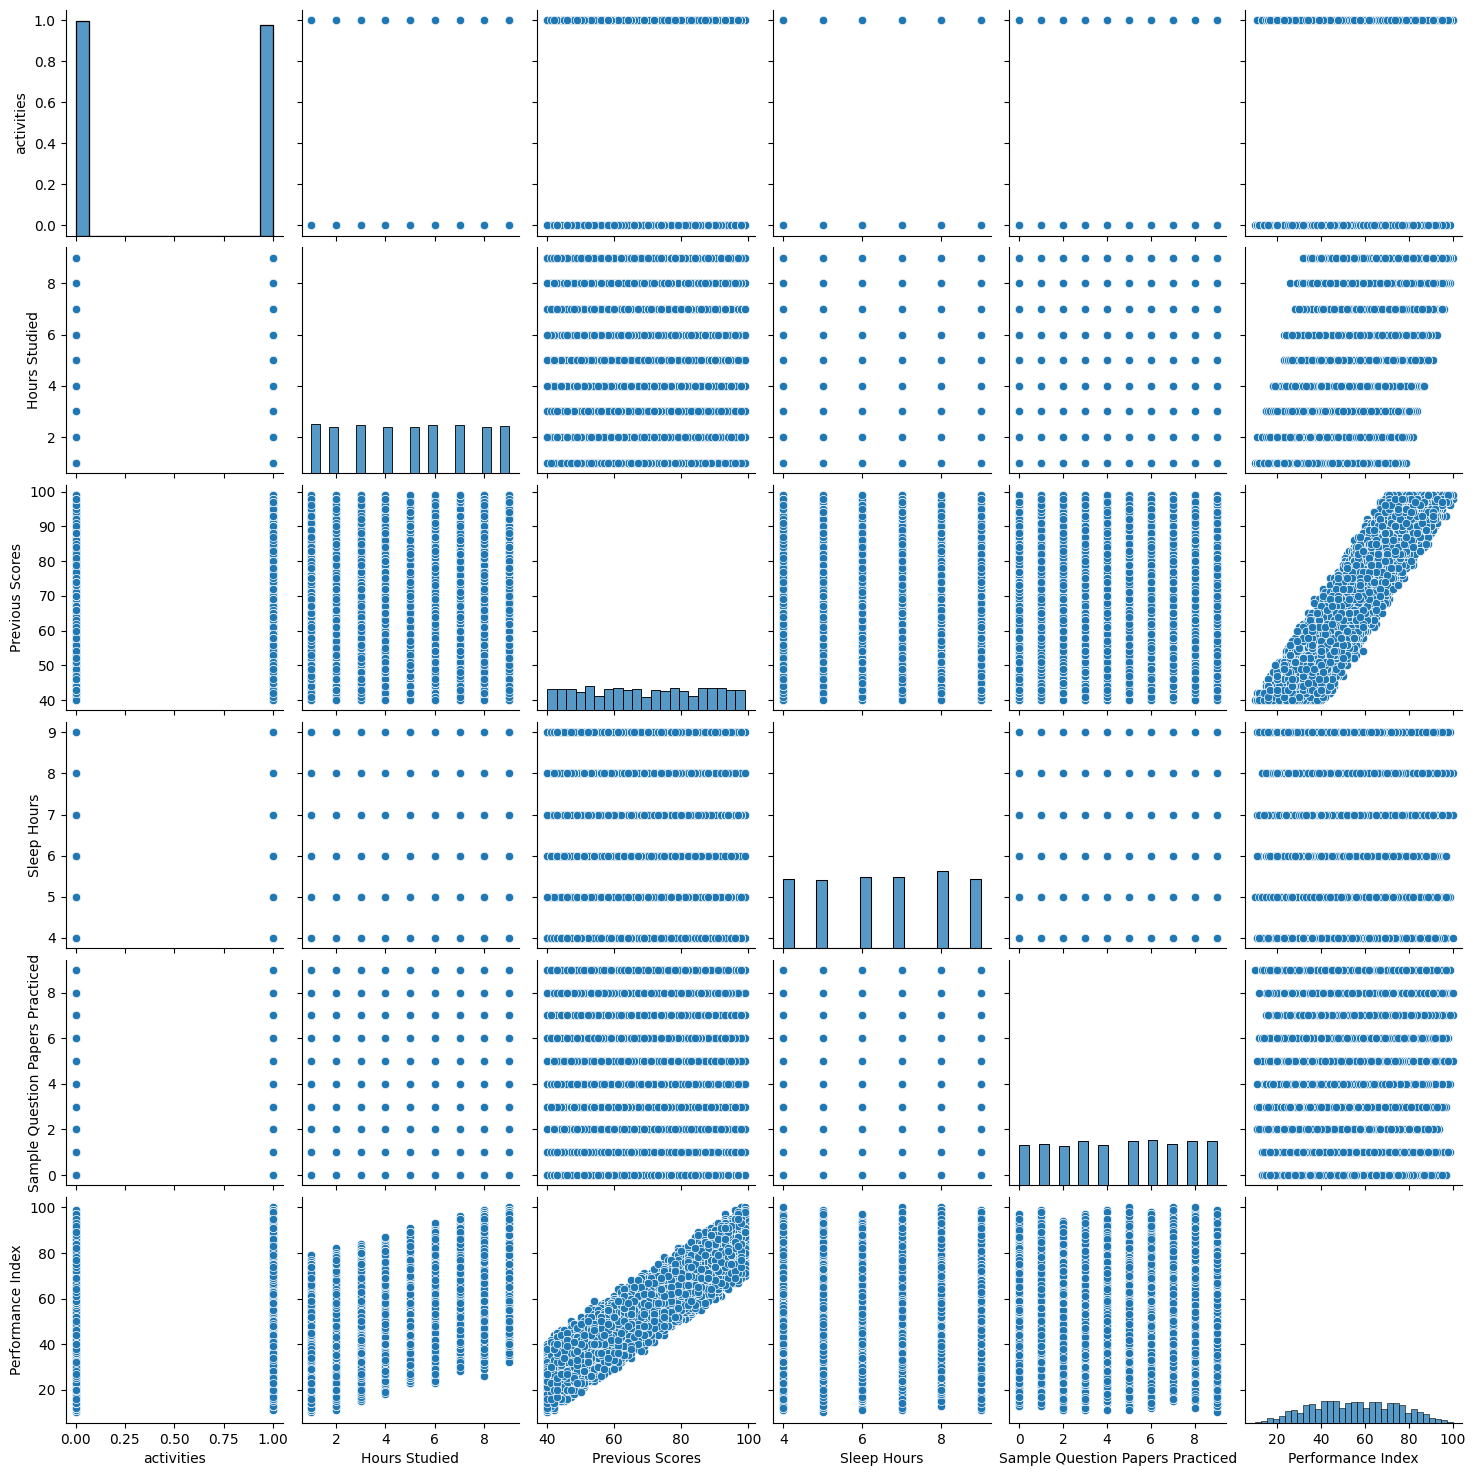

In [59]:
sns.pairplot(data)
plt.show()

# Détecter les Valeurs Aberrantes 

<Figure size 1000x600 with 0 Axes>

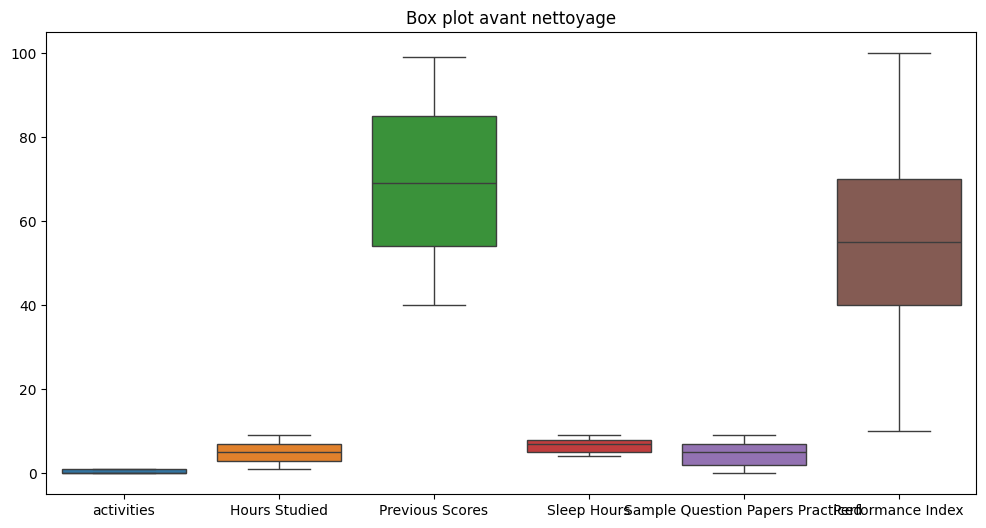

In [65]:
#Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title("Box plot avant nettoyage")
plt.show()

In [55]:
# Z_score
outliers = []
def detecter_outliers(data,threshold):
    mean = np.mean(data)
    std = np.std(data)
    for i in data : 
        z_score = (i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i) 
    return outliers
            
    


In [38]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [59]:
detecter_outliers(data['Previous Scores'],3)

[]

In [66]:
for column in data.select_dtypes(include=[np.number]).columns:
    skewness_per_column = data[column].skew()
    print(f"skewness for {column}: {skewness_per_column}")

skewness for activities: 0.020058750569044215
skewness for Hours Studied: -0.0033483737916364534
skewness for Previous Scores: 0.0055813419610842956
skewness for Sleep Hours: -0.04134960099660273
skewness for Sample Question Papers Practiced: -0.034893124735861716
skewness for Performance Index: -0.00041186196091178305


<Axes: xlabel='Previous Scores'>

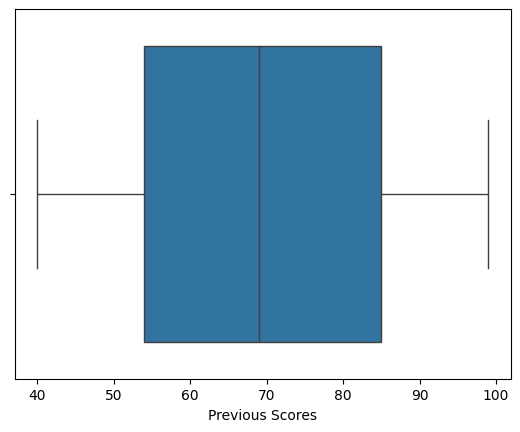

In [68]:
sns.boxplot(x=data['Previous Scores'])

Statistiques descriptives du dataset :
       Hours Studied  Previous Scores  Sleep Hours  \
count    1006.000000      1004.000000  1003.000000   
mean        4.623712        70.128955     6.810508   
std         4.697153        21.698834     3.762312   
min       -12.861731         8.241870    -8.561205   
25%         2.000000        55.000000     5.000000   
50%         5.000000        71.000000     7.000000   
75%         7.000000        85.000000     8.000000   
max        22.699509       131.882574    21.681205   

       Sample Question Papers Practiced  Performance Index  
count                       1007.000000        1100.000000  
mean                           4.544411          55.410000  
std                            5.056548          26.276026  
min                          -14.193286          10.000000  
25%                            2.000000          31.000000  
50%                            5.000000          57.000000  
75%                            7.000000        

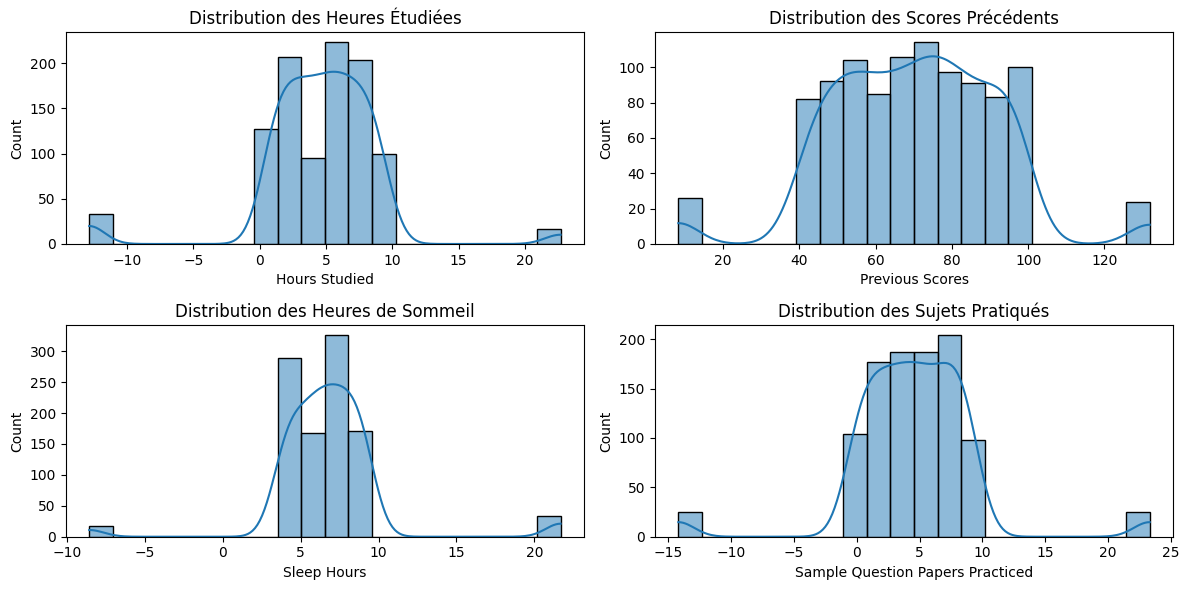

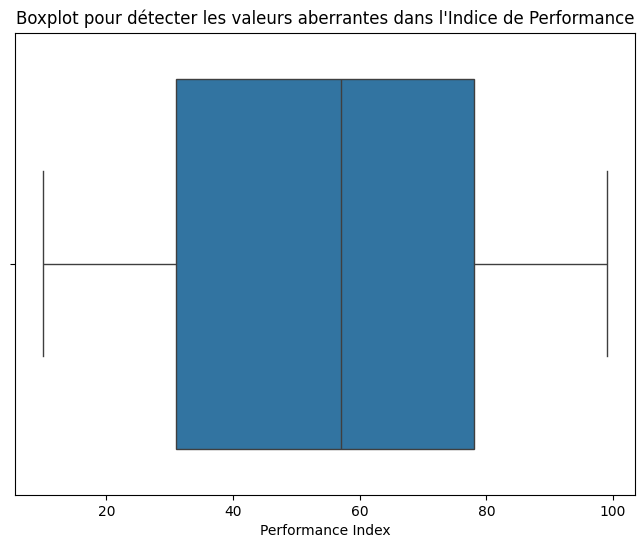

Le dataset a été enregistré avec succès dans 'nouveau_dataset.csv'.


In [61]:
import pandas as pd
import numpy as np
import random

# Créer un dataset avec des valeurs réalistes (similaire à votre dataset initial)
# Simulons un dataset avec des valeurs réalistes de base
np.random.seed(42)  # Pour la reproductibilité des résultats

# Taille du dataset
n = 1000

# Colonnes du dataset
hours_studied = np.random.randint(1, 10, size=n)  # Heures étudiées entre 1 et 10
previous_scores = np.random.randint(40, 100, size=n)  # Scores précédents entre 40 et 100
extracurricular_activities = np.random.choice(['Yes', 'No'], size=n)  # Activités extra-scolaires
sleep_hours = np.random.randint(4, 10, size=n)  # Heures de sommeil entre 4 et 10
sample_question_papers_practiced = np.random.randint(0, 10, size=n)  # Nombre de sujets pratiqués
performance_index = np.random.randint(10, 100, size=n)  # Indice de performance entre 10 et 100

# Créer un DataFrame initial
df = pd.DataFrame({
    'Hours Studied': hours_studied,
    'Previous Scores': previous_scores,
    'Extracurricular Activities': extracurricular_activities,
    'Sleep Hours': sleep_hours,
    'Sample Question Papers Practiced': sample_question_papers_practiced,
    'Performance Index': performance_index
})

# 1. Ajouter des valeurs manquantes (Missing values)
# Pourcentage de valeurs manquantes à ajouter
missing_percentage = 0.1  # 10% de valeurs manquantes
n_missing = int(len(df) * missing_percentage)

# Ajouter des valeurs manquantes aléatoires pour chaque colonne numérique
for column in ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']:
    missing_indices = np.random.choice(df.index, size=n_missing, replace=False)
    df.loc[missing_indices, column] = np.nan

# Ajouter des valeurs manquantes dans la colonne catégorielle 'Extracurricular Activities'
missing_indices_cat = np.random.choice(df.index, size=int(len(df) * 0.1), replace=False)
df.loc[missing_indices_cat, 'Extracurricular Activities'] = np.nan

# 2. Ajouter des données aberrantes (Outliers)
outlier_percentage = 0.05  # 5% de valeurs aberrantes
n_outliers = int(len(df) * outlier_percentage)

# Ajouter des outliers dans les colonnes numériques
for column in ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']:
    # Calculer les limites des valeurs normales pour chaque colonne
    lower_bound = df[column].mean() - 3 * df[column].std()
    upper_bound = df[column].mean() + 3 * df[column].std()

    # Créer des indices aléatoires pour les outliers
    outlier_indices = np.random.choice(df.index, size=n_outliers, replace=False)
    
    # Ajouter des outliers : Valeurs au-dessus ou en-dessous des bornes
    df.loc[outlier_indices, column] = np.random.choice([lower_bound - 10, upper_bound + 10], size=n_outliers)

# 3. Créer des lignes supplémentaires pour enrichir le dataset
n_new_rows = 100  # Nombre de nouvelles lignes à ajouter
new_data = {
    'Hours Studied': np.random.randint(1, 10, size=n_new_rows),
    'Previous Scores': np.random.randint(40, 100, size=n_new_rows),
    'Extracurricular Activities': np.random.choice(['Yes', 'No'], size=n_new_rows),
    'Sleep Hours': np.random.randint(4, 10, size=n_new_rows),
    'Sample Question Papers Practiced': np.random.randint(0, 10, size=n_new_rows),
    'Performance Index': np.random.randint(10, 100, size=n_new_rows)
}

# Créer un DataFrame pour les nouvelles lignes
new_df = pd.DataFrame(new_data)

# Ajouter les nouvelles lignes au dataset principal
df = pd.concat([df, new_df], ignore_index=True)

# Afficher quelques statistiques et vérifier la présence des valeurs manquantes et des outliers
print("Statistiques descriptives du dataset :")
print(df.describe())

print("\nNombre de valeurs manquantes par colonne :")
print(df.isnull().sum())

# Visualiser la distribution des données après ajout des valeurs manquantes et des outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Visualiser les distributions
plt.figure(figsize=(12, 6))

# Histograms
plt.subplot(2, 2, 1)
sns.histplot(df['Hours Studied'], kde=True, bins=20)
plt.title('Distribution des Heures Étudiées')

plt.subplot(2, 2, 2)
sns.histplot(df['Previous Scores'], kde=True, bins=20)
plt.title('Distribution des Scores Précédents')

plt.subplot(2, 2, 3)
sns.histplot(df['Sleep Hours'], kde=True, bins=20)
plt.title('Distribution des Heures de Sommeil')

plt.subplot(2, 2, 4)
sns.histplot(df['Sample Question Papers Practiced'], kde=True, bins=20)
plt.title('Distribution des Sujets Pratiqués')

plt.tight_layout()
plt.show()

# Boxplot pour identifier les outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Performance Index'])
plt.title('Boxplot pour détecter les valeurs aberrantes dans l\'Indice de Performance')
plt.show()
# Enregistrer le dataset modifié dans un nouveau fichier CSV
df.to_csv('Student_Performance2.csv', index=False)

print("Le dataset a été enregistré avec succès dans 'nouveau_dataset.csv'.")
